# Importing GeoPandas

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\aky\AppData\Local\Temp\ipykernel_23204\1883949781.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://s

In [2]:
from shapely.geometry import Polygon

In [7]:
!pip install basemap

     -------------------------------------- 488.0/488.0 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 30.5/30.5 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 46.5/46.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 4.9/4.9 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.5.0
    Uninstalling pyproj-3.5.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\aky\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\pyproj\\database.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [5]:
!pip install geopy

     -------------------------------------- 119.8/119.8 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [6]:
# Converting address to geometry (latitue and longitude)
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

In [35]:
states = gpd.read_file("C:/Users/aky/Documents/Programs/Geospatial/data/StatPlanet_Australia/australia/web/map/map.shp")
states.head()

,SA4_CODE11,SA4_NAME11,GCC_CODE11,GCC_NAME11,STE_CODE11,STE_NAME11,ALBERS_SQM,geometry
0,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,5.189451e+10,"POLYGON ((149.97668 -37.50506, 149.95885 -37.4..."
1,102,Central Coast,1GSYD,Greater Sydney,1,New South Wales,1.680860e+09,"POLYGON ((151.06845 -33.46010, 151.06399 -33.4..."
2,103,Central West,1RNSW,Rest of NSW,1,New South Wales,7.029781e+10,"POLYGON ((149.84205 -31.98391, 149.83912 -31.9..."
3,104,Coffs Harbour - Grafton,1RNSW,Rest of NSW,1,New South Wales,1.322978e+10,"POLYGON ((152.55852 -28.99008, 152.61699 -28.9..."
4,105,Far West and Orana,1RNSW,Rest of NSW,1,New South Wales,3.393643e+11,"POLYGON ((146.09495 -33.27596, 146.07658 -33.2..."


<AxesSubplot:>

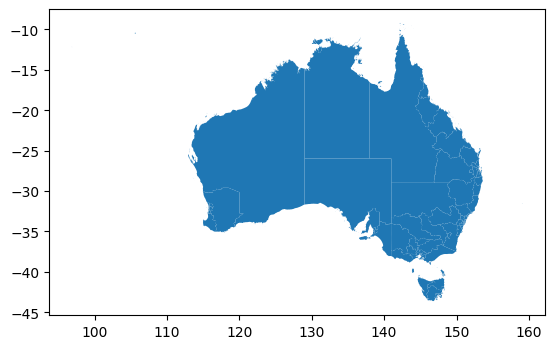

In [15]:
states.plot()

In [ ]:
print(states["SA4_NAME11"].unique())
print(states["SA4_NAME11"].unique().shape)

array(['Capital Region', 'Central Coast', 'Central West',
       'Coffs Harbour - Grafton', 'Far West and Orana',
       'Hunter Valley exc Newcastle', 'Illawarra', 'Mid North Coast',
       'Murray', 'New England and North West',
       'Newcastle and Lake Macquarie', 'Richmond - Tweed', 'Riverina',
       'Southern Highlands and Shoalhaven',
       'Sydney - Baulkham Hills and Hawkesbury', 'Sydney - Blacktown',
       'Sydney - City and Inner South', 'Sydney - Eastern Suburbs',
       'Sydney - Inner South West', 'Sydney - Inner West',
       'Sydney - North Sydney and Hornsby', 'Sydney - Northern Beaches',
       'Sydney - Outer South West',
       'Sydney - Outer West and Blue Mountains', 'Sydney - Parramatta',
       'Sydney - Ryde', 'Sydney - South West', 'Sydney - Sutherland',
       'Ballarat', 'Bendigo', 'Geelong', 'Hume', 'Latrobe - Gippsland',
       'Melbourne - Inner', 'Melbourne - Inner East',
       'Melbourne - Inner South', 'Melbourne - North East',
       'Melbourne -

In [19]:
#states["GCC_CODE11"].unique()
states["GCC_NAME11"].unique()

array(['Rest of NSW', 'Greater Sydney', 'Rest of Vic.',
       'Greater Melbourne', 'Greater Brisbane', 'Rest of Qld',
       'Greater Adelaide', 'Rest of SA', 'Rest of WA', 'Greater Perth',
       'Greater Hobart', 'Rest of Tas.', 'Greater Darwin', 'Rest of NT',
       'Australian Capital Territory', 'Other Territories'], dtype=object)

In [20]:
# Display GCC with counts
states["GCC_NAME11"].value_counts()

Greater Sydney                  15
Rest of NSW                     13
Rest of Qld                     10
Greater Melbourne                9
Greater Brisbane                 9
Rest of Vic.                     8
Greater Perth                    6
Greater Adelaide                 4
Rest of SA                       3
Rest of WA                       3
Rest of Tas.                     3
Greater Hobart                   1
Greater Darwin                   1
Rest of NT                       1
Australian Capital Territory     1
Other Territories                1
Name: GCC_NAME11, dtype: int64

<AxesSubplot:>

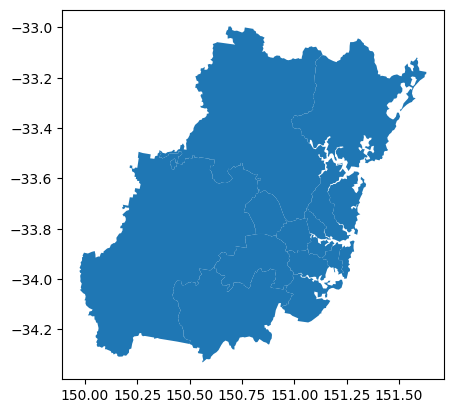

In [22]:
states[states["GCC_NAME11"] == "Greater Sydney"].plot()

<AxesSubplot:>

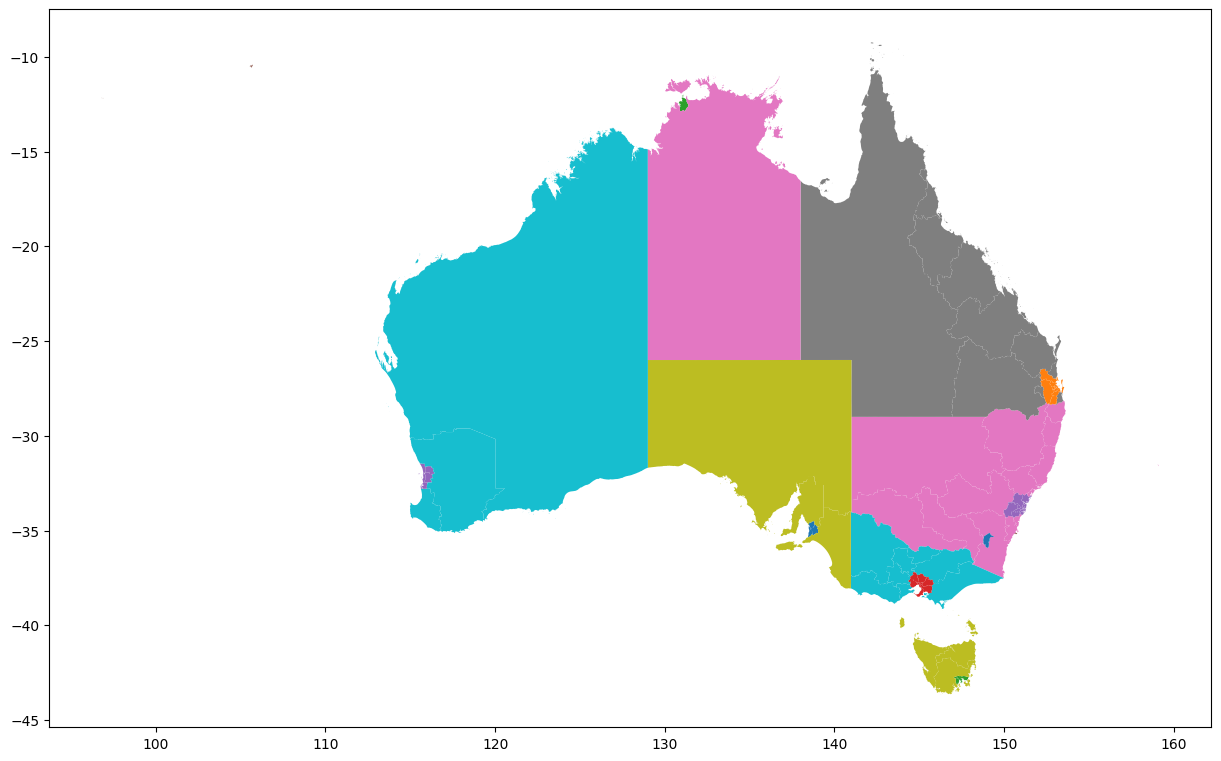

In [23]:
# Plot the map with different GCC colors
states.plot(column="GCC_NAME11", figsize=(15,15))

<AxesSubplot:>

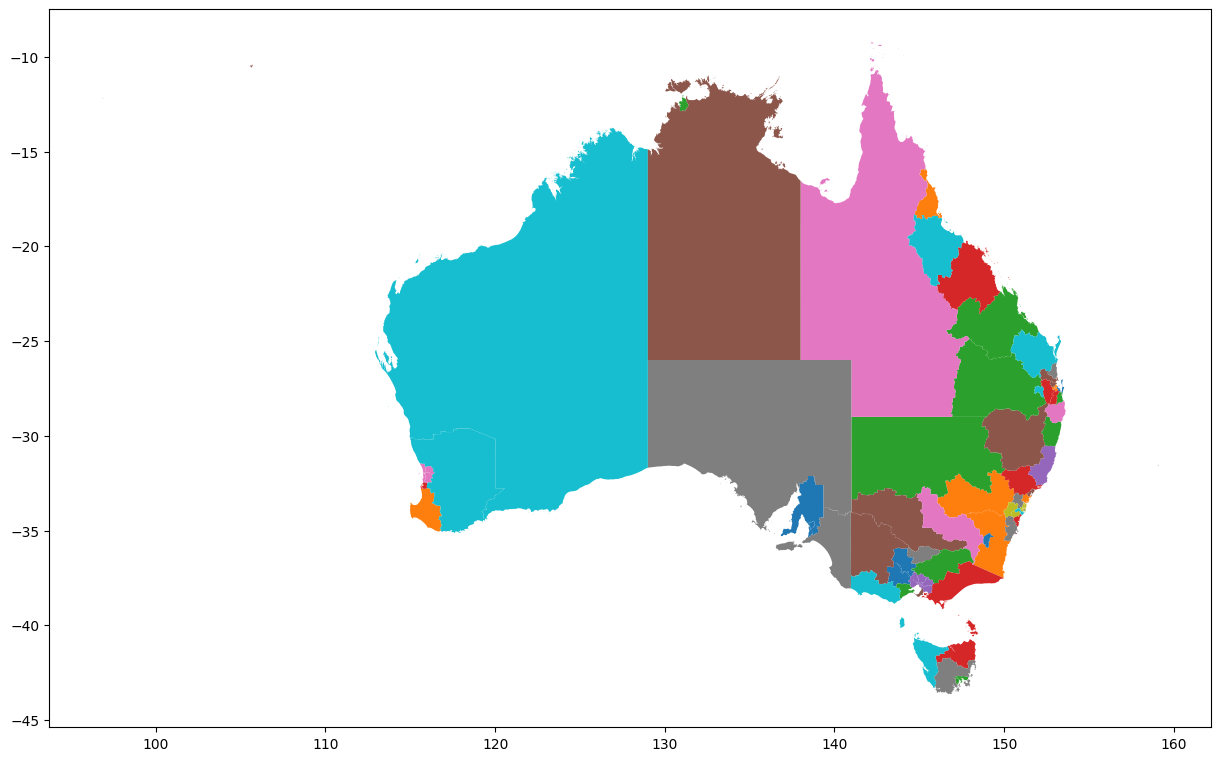

In [36]:
states.plot(column="SA4_NAME11", figsize=(15,15))

<AxesSubplot:>

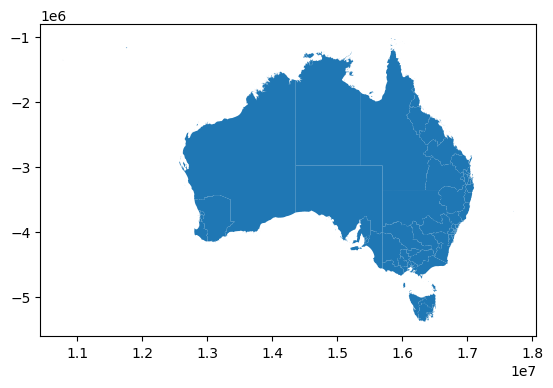

In [37]:
states.to_crs({'proj':'merc'}).plot()